<a href="https://colab.research.google.com/github/SergioaA64/SergioaA64/blob/main/09-Erica_Ramalho_Estat%C3%ADstica_Descritiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ENAP - Especialização em Ciência de Dados aplicada a Políticas Públicas**

D6: Estatística Descritiva - Trabalho Final

Aluna: Erica Ramalho de Oliveira

Professor: Eduardo Monteiro de Castro Gomes


**Contextualização do Problema**

Este trabalho apresenta os Dados Estatísticos do Transporte Aéreo, com ênfase na exploração de impactos da pandemia de COVID-19 nas operações aéreas nacionais.

Para este trabalho os dados foram baixados do endereço: https://www.anac.gov.br/acesso-a-informacao/dados-abertos/areas-de-atuacao/voos-e-operacoes-aereas/dados-estatisticos-do-transporte-aereo/48-dados-estatisticos-do-transporte-aereo-formato-csv; como o dados são disponibilizados em arquivo zipado, ele foi carregado em conta do Google Drive para acesso diretamente ao arquivo .csv.

A descrição dos campos encontra-se em https://www.anac.gov.br/acesso-a-informacao/dados-abertos/areas-de-atuacao/voos-e-operacoes-aereas/dados-estatisticos-do-transporte-aereo/48-dados-estatisticos-do-transporte-aereo.

In [ ]:
#Carga dos pacotes
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Conexão com o GDrive
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#Carga dos dados
df=pd.read_csv('gdrive/My Drive/Dados.csv', delimiter=';', decimal=',', encoding='latin1', dtype={'PASSAGEIROS PAGOS':'Int64',	
                        'PASSAGEIROS GRÁTIS':'Int64', 'DECOLAGENS':'Int64',	'ASSENTOS':'Int64', 'ANO':'Int64',	'MÊS':'Int64'})
df.head(3)

,EMPRESA (SIGLA),EMPRESA (NOME),EMPRESA (NACIONALIDADE),ANO,MÊS,AEROPORTO DE ORIGEM (SIGLA),AEROPORTO DE ORIGEM (NOME),AEROPORTO DE ORIGEM (UF),AEROPORTO DE ORIGEM (REGIÃO),AEROPORTO DE ORIGEM (PAÍS),AEROPORTO DE ORIGEM (CONTINENTE),AEROPORTO DE DESTINO (SIGLA),AEROPORTO DE DESTINO (NOME),AEROPORTO DE DESTINO (UF),AEROPORTO DE DESTINO (REGIÃO),AEROPORTO DE DESTINO (PAÍS),AEROPORTO DE DESTINO (CONTINENTE),NATUREZA,GRUPO DE VOO,PASSAGEIROS PAGOS,PASSAGEIROS GRÁTIS,CARGA PAGA (KG),CARGA GRÁTIS (KG),CORREIO (KG),ASK,RPK,ATK,RTK,COMBUSTÍVEL (LITROS),DISTÂNCIA VOADA (KM),DECOLAGENS,CARGA PAGA KM,CARGA GRATIS KM,CORREIO KM,ASSENTOS,PAYLOAD,HORAS VOADAS,BAGAGEM (KG)
0,AAL,"AMERICAN AIRLINES, INC.",ESTRANGEIRA,2011,1,KAUS,"AUSTIN, TEXAS",NaN,NaN,ESTADOS UNIDOS DA AMÉRICA,AMÉRICA DO NORTE,KDFW,"DALLAS & FORT WORTH, TEXAS",NaN,NaN,ESTADOS UNIDOS DA AMÉRICA,AMÉRICA DO NORTE,INTERNACIONAL,REGULAR,0,0,0.0,0.0,0.0,75276.0,50184.0,13770.0,7463.0,NaN,306.0,1,2.946780e+06,0.0,0.0,246,45000.0,2.50,NaN
1,AAL,"AMERICAN AIRLINES, INC.",ESTRANGEIRA,2011,1,KDFW,"DALLAS & FORT WORTH, TEXAS",NaN,NaN,ESTADOS UNIDOS DA AMÉRICA,AMÉRICA DO NORTE,SBGL,RIO DE JANEIRO,RJ,SUDESTE,BRASIL,AMÉRICA DO SUL,INTERNACIONAL,REGULAR,2391,51,28903.0,0.0,6362.0,23968900.0,20129800.0,3830640.0,2108580.0,NaN,109447.0,13,2.433340e+08,0.0,53561700.0,2847,455000.0,136.88,NaN
2,AAL,"AMERICAN AIRLINES, INC.",ESTRANGEIRA,2011,1,KDFW,"DALLAS & FORT WORTH, TEXAS",NaN,NaN,ESTADOS UNIDOS DA AMÉRICA,AMÉRICA DO NORTE,SBGR,GUARULHOS,SP,SUDESTE,BRASIL,AMÉRICA DO SUL,INTERNACIONAL,REGULAR,6879,95,298598.0,0.0,9302.0,60840700.0,56710500.0,11129400.0,7642250.0,NaN,247320.0,30,2.461640e+09,0.0,76685700.0,7380,1350000.0,299.50,NaN


**VARIÁVEIS** na base de dados, por tipo:

**Qualitativas Nominais** = EMPRESA (SIGLA), EMPRESA (NOME),	EMPRESA (NACIONALIDADE), AEROPORTO DE ORIGEM (SIGLA),	AEROPORTO DE ORIGEM (NOME),	AEROPORTO DE ORIGEM (UF),	AEROPORTO DE ORIGEM (REGIÃO),	AEROPORTO DE ORIGEM (PAÍS),	AEROPORTO DE ORIGEM (CONTINENTE),	AEROPORTO DE DESTINO (SIGLA),	AEROPORTO DE DESTINO (NOME),	AEROPORTO DE DESTINO (UF),	AEROPORTO DE DESTINO (REGIÃO),	AEROPORTO DE DESTINO (PAÍS),	AEROPORTO DE DESTINO (CONTINENTE),	NATUREZA e GRUPO DE VOO.

**Qualitativas Ordinais** = ANO e	MÊS.

**Quantitativas Discretas** = PASSAGEIROS PAGOS,	PASSAGEIROS GRÁTIS, DECOLAGENS e  ASSENTOS.

**Quantitativas Contínuas** = CARGA PAGA (KG),	CARGA GRÁTIS (KG),	CORREIO (KG),	ASK,	RPK,	ATK,	RTK,	COMBUSTÍVEL (LITROS),	DISTÂNCIA VOADA (KM), CARGA PAGA KM,	CARGA GRATIS KM,	CORREIO KM, PAYLOAD,	HORAS VOADAS,	e BAGAGEM (KG).

Observação: Cada linha da base é o registro de uma linha aérea, não de uma etapa de voo. As linhas com regularidade se caracterizam por ter uma quantidade de "DECOLAGENS" maior que 1 em seu registro.

**Item 1**: Visualização da diminuição das operações domésticas e internacionais desde o início da pandemia de COVID-19.

In [ ]:
#Verificação da tendência de crescimento das operações até o início da pandemia de COVID-19
total_ano = df.groupby(['ANO','NATUREZA'])['DECOLAGENS'].sum()
total_ano

ANO   NATUREZA     
2011  DOMÉSTICA        964598
      INTERNACIONAL    135046
2012  DOMÉSTICA        998323
      INTERNACIONAL    141810
2013  DOMÉSTICA        954221
      INTERNACIONAL    142922
2014  DOMÉSTICA        949062
      INTERNACIONAL    148632
2015  DOMÉSTICA        942342
      INTERNACIONAL    147611
2016  DOMÉSTICA        834666
      INTERNACIONAL    136460
2017  DOMÉSTICA        811665
      INTERNACIONAL    135260
2018  DOMÉSTICA        822575
      INTERNACIONAL    151394
2019  DOMÉSTICA        809920
      INTERNACIONAL    146396
2020  DOMÉSTICA        409925
      INTERNACIONAL     60213
2021  DOMÉSTICA        272382
      INTERNACIONAL     27452
Name: DECOLAGENS, dtype: Int64

In [ ]:
#Agrupamento por ano e por natureza, somando os índices acumuláveis e descartando o que não faz sentido somar, como referência de mês,
# indicadores e outros parâmetros que não são de interesse neste item.
df_groupedNAT_soma = df.groupby(["ANO","NATUREZA"]).sum()
df_groupedNAT_soma.drop(columns=["MÊS", "ASK", "RPK", "ATK", "RTK", "COMBUSTÍVEL (LITROS)",	"DISTÂNCIA VOADA (KM)", "CARGA PAGA KM",
                                 "CARGA GRATIS KM",	"CORREIO KM", "PAYLOAD",	"HORAS VOADAS"], inplace=True)
df_groupedNAT_soma.head(6)

PASSAGEIROS PAGOS  ...  BAGAGEM (KG)
ANO  NATUREZA                          ...              
2011 DOMÉSTICA               81908858  ...  1.072822e+09
     INTERNACIONAL           17855859  ...  1.078828e+08
2012 DOMÉSTICA               88499742  ...  1.092072e+09
     INTERNACIONAL           18903483  ...  1.150575e+08
2013 DOMÉSTICA               89969709  ...  1.022255e+09
     INTERNACIONAL           19752447  ...  1.287551e+08

[6 rows x 8 columns]

Text(0.5, 1.0, 'Evolução das operações')

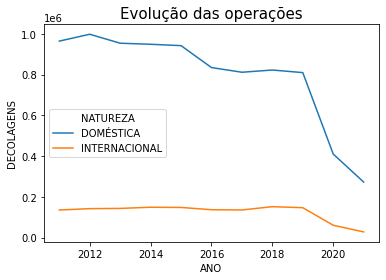

In [ ]:
#Visualização do impacto da pandemia nas operações em 2020 e 2021 (até julho)
fig , ax = plt.subplots()
sns.lineplot(data=df_groupedNAT_soma, x="ANO", y="DECOLAGENS", hue="NATUREZA")
ax.set_title("Evolução das operações", fontsize=15)

Nota-se, a partir do gráfico, que não se vinha em uma tendência de alta de operações no setor aéreo, tanto voos nacionais como internacionais vinham em certa estabilidade até o surgimento do SARS-COV-19 e a forte diminuição dos deslocamentos em razão das medidas de contenção e enfrentamento da pandemia.

.

Foi identificado o mesmo impacto sobre a aviação nacional, como visto abaixo, com as regiões de origem das operações.

In [ ]:
#Evolução ano a ano por região do aeroporto de origem das operações. 
df_domestica = df.loc[lambda df: df['NATUREZA'] == 'DOMÉSTICA']
df_groupedREG_soma = df_domestica.groupby(["ANO","AEROPORTO DE ORIGEM (REGIÃO)"]).sum()
df_groupedREG_soma.drop(columns=["MÊS", "ASK", "RPK", "ATK", "RTK", "COMBUSTÍVEL (LITROS)",	"DISTÂNCIA VOADA (KM)",
                      "CARGA PAGA KM",	"CARGA GRATIS KM",	"CORREIO KM", "PAYLOAD",	"HORAS VOADAS"], inplace=True)
df_groupedREG_soma.head()

PASSAGEIROS PAGOS  ...  BAGAGEM (KG)
ANO  AEROPORTO DE ORIGEM (REGIÃO)                     ...              
2011 CENTRO-OESTE                           11072229  ...   142071208.0
     NORDESTE                               15727551  ...   222981300.0
     NORTE                                   4985501  ...    72657336.0
     SUDESTE                                39260356  ...   499652876.0
     SUL                                    10863221  ...   135459519.0

[5 rows x 8 columns]

Text(0.5, 1.0, 'Evolução das operações domésticas')

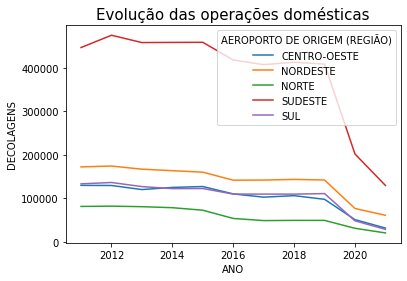

In [ ]:
fig , ax = plt.subplots()
sns.lineplot(data=df_groupedREG_soma, x="ANO", y="DECOLAGENS", hue="AEROPORTO DE ORIGEM (REGIÃO)")
ax.set_title("Evolução das operações domésticas", fontsize=15)

**Item 2**: A menos das operações internacionais, onde a distância voada depende da rota do voo, vamos avaliar se as distâncias voadas em operações domésticas no período inicial da pandemia se mantiveram semelhantes ao período pré-pandemia imediatamente anterior. Isso se justifica como avaliação do impacto regulatório da decisão da ANAC em março/2020 de manter a malha mínima de voos nacionais, independente de demanda, para o transporte de passageiros.

In [ ]:
#Criando nova coluna que considera a distância voada por operação(voo) e não por linha(original agrupado)
###df_domestica = df.loc[lambda df: df['NATUREZA'] == 'DOMÉSTICA']
df_domestica['DISTÂNCIA POR VOO (KM)'] = df_domestica['DISTÂNCIA VOADA (KM)']/df_domestica['DECOLAGENS']
#df_domestica

#Avaliando o impacto no âmbito nacional, rotulando dois períodos como pré-pandemia (2019) e pandemia (2020)
df_prepand = df_domestica[df_domestica["ANO"] == 2019]
df_pand = df_domestica[df_domestica["ANO"] == 2020]
#df_pand

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


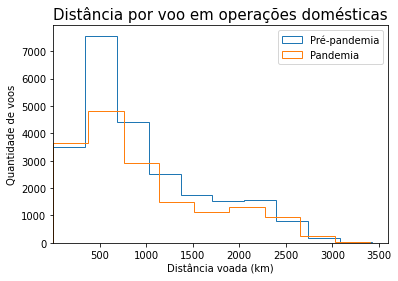

In [ ]:
fig, ax = plt.subplots()
ax.hist(df_prepand['DISTÂNCIA POR VOO (KM)'],label="Pré-pandemia",histtype="step",bins=10)
ax.hist(df_pand['DISTÂNCIA POR VOO (KM)'],label="Pandemia",histtype="step",bins=10)
ax.set_xlim(1,3600)
ax.set_xlabel("Distância voada (km)")
ax.set_ylabel("Quantidade de voos")
ax.set_title("Distância por voo em operações domésticas", fontsize=15)
plt.legend()
plt.show()

Do gráfico verifica-se que houve redução significativa de oferta dos voos mais típicos (distância de 500 a 1500 km), entretanto foi mantida a tendência da distribuição e não se observou a parada total (zerada a quantidade de voos) de nenhum segmento, o que era a intenção da medida avaliada.

.

**Item 3**: Entendendo o posicionamento das empresas aéreas nacionais quanto ao tipo de transporte principal. Justificativa: a base apresenta dados de passageiros, carga, correio e bagagem sem categorizar a operação, o que faz sentido, especialmente por ocorrer junção de voos de transporte de passageiros juntamente com carga. Vamos, neste item, tentar avaliar se as empresas apresentam uma participação significativa em um ou mais mercados de transporte.

In [ ]:
#Agrupando por empresa aérea, descartando métricas sem utilização.
df_groupedEMP = df_domestica.groupby(["EMPRESA (NOME)"]).sum()
df_groupedEMP.drop(columns=["ANO", "MÊS", "ASK", "RPK", "ATK", "RTK", "COMBUSTÍVEL (LITROS)",	"DISTÂNCIA VOADA (KM)",
      "CARGA PAGA KM",	"CARGA GRATIS KM", "CORREIO KM", "PAYLOAD",	"HORAS VOADAS", "DISTÂNCIA POR VOO (KM)"], inplace=True)
df_groupedEMP

,PASSAGEIROS PAGOS,PASSAGEIROS GRÁTIS,CARGA PAGA (KG),CARGA GRÁTIS (KG),CORREIO (KG),DECOLAGENS,ASSENTOS,BAGAGEM (KG)
EMPRESA (NOME),,,,,,,,
ABAETÉ LINHAS AÉREAS LTDA,155,0,0.000000e+00,0.0,0.0,27,378,0.000000e+00
ABAETÉ LINHAS AÉREAS S.A.,3475,8,5.140000e+02,0.0,0.0,635,9308,1.864900e+04
ABSA - AEROLINHAS BRASILEIRAS S.A.,0,0,5.703144e+08,53099.0,92257567.0,24467,0,4.564000e+03
ASTA LINHAS AÉREAS LTDA ( EX - AMÉRICA DO SUL LINHAS AÉREAS LTDA.),6447,0,8.514100e+04,0.0,0.0,1219,10944,6.449000e+04
AZUL CONECTA LTDA. (EX TWO TAXI AEREO LTDA),6022,0,1.475520e+05,0.0,0.0,1308,9189,6.022000e+04
AZUL LINHAS AÉREAS BRASILEIRAS S/A,183847327,5886819,4.853601e+08,16337467.0,2686880.0,2274011,244145782,1.873708e+09
BRAVA LINHAS AÉREAS LTDA. (EX- NHT),120508,840,0.000000e+00,0.0,0.0,21490,401396,1.036924e+06
COLT TRANSPORTE AÉREO S/A,0,0,2.110298e+06,1183975.0,30493299.0,4024,0,0.000000e+00
CONNECT LINHAS AÉREAS S.A. (ANTIGA CONNECT TÁXI AÉREO LTDA.),0,0,4.946613e+06,0.0,0.0,515,0,0.000000e+00


In [ ]:
#Como a lista trouxe várias empresas que não operam mais, a exemplo de WEBJET e AVIANCA, 
#avaliaremos as empresas atuais, restringindo os dados a 2021.
df_2021 = df_domestica[df_domestica["ANO"] == 2021]
#Agrupando por empresa aérea em 2021, descartando métricas sem utilização.
df_groupedEMP_2021 = df_2021.groupby(["EMPRESA (SIGLA)"]).sum()
df_groupedEMP_2021.drop(columns=["ANO", "MÊS", "ASK", "RPK", "ATK", "RTK", "COMBUSTÍVEL (LITROS)",	"DISTÂNCIA VOADA (KM)",
          "CARGA PAGA KM",	"CARGA GRATIS KM",	"CORREIO KM", "PAYLOAD",	"HORAS VOADAS", "DISTÂNCIA POR VOO (KM)"], inplace=True)
df_groupedEMP_2021

,PASSAGEIROS PAGOS,PASSAGEIROS GRÁTIS,CARGA PAGA (KG),CARGA GRÁTIS (KG),CORREIO (KG),DECOLAGENS,ASSENTOS,BAGAGEM (KG)
EMPRESA (SIGLA),,,,,,,,
AZU,11668996,302561,76259351.0,808316.0,0.0,118590,15175399,92221909.0
GLO,9262789,212082,20138994.0,1458230.0,0.0,65392,11503830,36876272.0
IPM,19044,0,0.0,0.0,0.0,425,68850,438012.0
LTG,0,0,17689700.0,0.0,0.0,730,0,0.0
MWM,0,0,6832863.0,19650.0,0.0,777,0,0.0
OMI,175,0,0.0,0.0,0.0,17,480,0.0
OWT,25743,0,724101.0,0.0,0.0,5959,41580,257430.0
PAM,59197,917,1262.0,0.0,0.0,2133,115535,505372.0
PTB,225317,4886,1250.0,0.0,0.0,5510,374974,1818777.0


Os gráficos a seguir apresentam o "market share" durante o ano de 2021, para isso foi feita a visualização da participação das empresas aéreas no total de decolagens, e depois no transporte de passageiros, de carga e de correio.

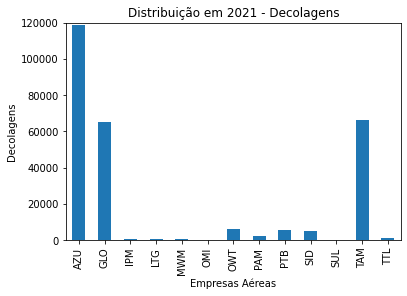

In [ ]:
fig , ax = plt.subplots()
df_groupedEMP_2021["DECOLAGENS"].plot.bar()
ax.set_ylabel("Decolagens")
ax.set_xlabel("Empresas Aéreas")
ax.set_title("Distribuição em 2021 - Decolagens")
ax.set_ylim(0,120000)
plt.show()

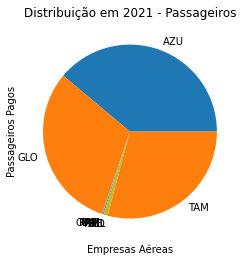

In [ ]:
fig , ax = plt.subplots()
df_groupedEMP_2021["PASSAGEIROS PAGOS"].plot.pie()
ax.set_ylabel("Passageiros Pagos")
ax.set_xlabel("Empresas Aéreas")
ax.set_title("Distribuição em 2021 - Passageiros")
plt.show()

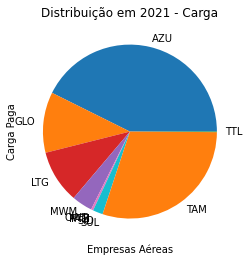

In [ ]:
fig , ax = plt.subplots()
df_groupedEMP_2021["CARGA PAGA (KG)"].plot.pie()
ax.set_ylabel("Carga Paga")
ax.set_xlabel("Empresas Aéreas")
ax.set_title("Distribuição em 2021 - Carga")
plt.show()

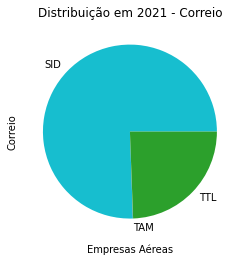

In [ ]:
fig , ax = plt.subplots()
df_groupedEMP_2021["CORREIO (KG)"].plot.pie()
ax.set_xlabel("Empresas Aéreas")
ax.set_ylabel("Correio")
ax.set_title("Distribuição em 2021 - Correio")
plt.show()

Dos gráficos acima, vemos uma predominância de determinadas empresas no transporte aéreo de correio e passageiros, com maior diversificação no transporte de carga.

.

**Item 4**: Verificando se o setor de correio sofreu impacto com a pandemia.

In [ ]:
#Verificando as duas empresas com predominância no transporte de correio.
df_domestica["DATA"] = df_domestica["ANO"]+df_domestica["MÊS"]/100 
df_Total = df_domestica[df_domestica["EMPRESA (SIGLA)"] == "TTL"]
df_groupedTot_y = df_Total.groupby(["ANO"])["CORREIO (KG)"].sum().reset_index()
#df_groupedTot_y.head()
df_Sideral = df_domestica[df_domestica["EMPRESA (SIGLA)"] == "SID"]
df_groupedSid_y = df_Sideral.groupby(["ANO"])["CORREIO (KG)"].sum().reset_index()
df_groupedSid_y.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ANO,CORREIO (KG)
0,2012,9790923.0
1,2013,16767012.0
2,2014,21881657.0
3,2015,28650637.0
4,2016,38126328.0


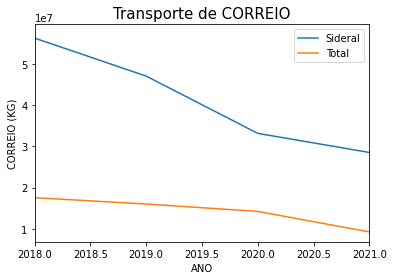

In [ ]:
#Visualizando o impacto para as empresas de CORREIO - Sideral e Total.
fig , ax = plt.subplots()
sns.lineplot(data=df_groupedSid_y, x="ANO", y="CORREIO (KG)", label="Sideral")
sns.lineplot(data=df_groupedTot_y, x="ANO", y="CORREIO (KG)", label="Total")
ax.set_xlim(2018,2021)
ax.set_title("Transporte de CORREIO", fontsize=15)
plt.legend()


Do gráfico, nota-se que o transporte de CORREIO também foi impactado pela pandemia, embora não seja tão óbvia a razão que justifique esse fato.

.


**Item 5**: Verificando o impacto no transporte de passageiros

In [ ]:
df_domestica["PASSAGEIROS TOTAL"] = df_domestica["PASSAGEIROS PAGOS"]+df_domestica["PASSAGEIROS GRÁTIS"]
df_groupedPAX = df_domestica.groupby(["DATA", "EMPRESA (SIGLA)"])["PASSAGEIROS TOTAL"].sum().reset_index()
df_groupedPAX.tail(100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,DATA,EMPRESA (SIGLA),PASSAGEIROS TOTAL
1527,2020.11,GLO,1638932
1528,2020.11,LTG,0
1529,2020.11,MWM,0
1530,2020.11,OWT,3394
1531,2020.11,PAM,4603
...,...,...,...
1622,2021.07,PAM,11638
1623,2021.07,PTB,37198
1624,2021.07,SID,656
1625,2021.07,TAM,1854114


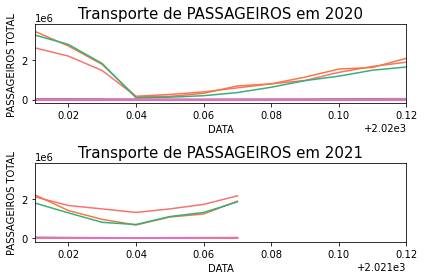

<Figure size 14400x720 with 0 Axes>

In [ ]:
#Visualizando o impacto para o transporte de Passageiros - Todas as empresas.
fig , ax = plt.subplots(2,1)
g2020 = sns.lineplot(ax = ax[0], data=df_groupedPAX, x="DATA", y="PASSAGEIROS TOTAL", hue="EMPRESA (SIGLA)", legend=None)
g2020.set_xlim(2020.01,2020.12)
g2020.set_title("Transporte de PASSAGEIROS em 2020", fontsize=15)
g2021 = sns.lineplot(ax = ax[1], data=df_groupedPAX, x="DATA", y="PASSAGEIROS TOTAL", hue="EMPRESA (SIGLA)", legend=None)
g2021.set_xlim(2021.01,2021.12)
g2021.set_title("Transporte de PASSAGEIROS em 2021", fontsize=15)
fig.tight_layout()
plt.figure(figsize=(200,10)) 
plt.show()


Dos gráficos, nota-se que o impacto da chamada "segunda onda" em 2021 foi menor e com uma retomada mais rápida do que a primeira onda de COVID-19.

.

**Item 6**: Verificação das taxas de ocupação das aeronaves, considerando a capacidade de assentos e a quantidade de passageiros transportados.

In [ ]:
#A partir daqui, verificaremos como se deu a taxa de ocupação das operações, durante 2021.
df_domestica["OCUPAÇÃO"] = df_domestica["PASSAGEIROS TOTAL"]/df_domestica["ASSENTOS"]

#Em razão de uma ocupação infinita que apareceu em uma operação da AZUL não indentificada, foram feitas tabelas temporárias
# para eliminar quaisquer valores que trouxessem contaminação aos cálculos, a saber:
#1) Restrição ao ano vigente
#2) Retirada dos registros em que não houve oferta de assentos
#3) Retirada dos voos improdutivos, trechos geralmente de transporte de aeronave para manuntenção e não possuem oferta de assentos

temp1 = df_domestica[df_domestica["ANO"] == 2021]

temp2 = temp1[temp1["ASSENTOS"] != 0]

temp3 = temp2[temp2["GRUPO DE VOO"] != "IMPRODUTIVO"]

#Com esse tratamento, foi possível fazer a média das ocupações mensais por empresa em 2021.
df_2021_Ocup = temp3.groupby(["DATA","EMPRESA (SIGLA)"])["OCUPAÇÃO"].mean().reset_index()
df_2021_Ocup.head(15)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,DATA,EMPRESA (SIGLA),OCUPAÇÃO
0,2021.01,AZU,0.732374
1,2021.01,GLO,0.763698
2,2021.01,OWT,0.521784
3,2021.01,PAM,0.613086
4,2021.01,PTB,0.551367
5,2021.01,SID,0.731416
6,2021.01,SUL,0.483077
7,2021.01,TAM,0.711411
8,2021.02,AZU,0.731029
9,2021.02,GLO,0.724287


In [ ]:
# Verificação das principais estatísticas descritivas da OCUPAÇÃO
df_2021_Ocup["OCUPAÇÃO"].describe()

count    55.000000
mean      0.594783
std       0.166277
min       0.073765
25%       0.477436
50%       0.638412
75%       0.727650
max       0.811011
Name: OCUPAÇÃO, dtype: float64

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


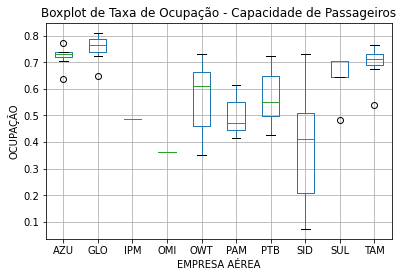

In [ ]:
#Visualizaçao de como se deu a ocupação de passageiros por Empresa Aérea, em 2021
fig, ax = plt.subplots()
df_2021_Ocup.boxplot(column="OCUPAÇÃO", by="EMPRESA (SIGLA)", ax=ax)
ax.set_xlabel("EMPRESA AÉREA")
ax.set_ylabel("OCUPAÇÃO")
ax.set_title("Boxplot de Taxa de Ocupação - Capacidade de Passageiros")
plt.suptitle("")
plt.show()

Do gráfico, verifica-se que as companhias mais tradicionais no transporte de passageiros (Azul, Gol e Latam) tem operado com taxas de ocupação médias superiores aos 70%, sendo que se considera algo em torno de 65% como ocupação mínima para que uma operação dê lucro (generalização de diversas fontes), enquanto que as empresas de aviação regional, historicamente trabalham com taxas de ocupação mais baixas, em torno de 50-60%, o que foi bem caracterizado pelo boxplot da Azul-Conecta (OWT), nome dado a parte da Azul que assumiu as operações quando da compra da empresa TWO-Flex, com forte atuação regional.

.

**Item 7**: Testes de hipóteses. Para uso do teste de Qui-quadrado entre variáveis do Dataframe, o colab deu erro de sessão falhando depois de usar toda a RAM disponível. Portanto, foi selecionado um extrato do ano de 2021, definido anteriormente como "temp1" para alguns testes. Foram escolhidas variáveis em que se esperava que houvesse e que não houvesse dependênica, somente por fins didáticos.

In [ ]:
#Definindo uma função para realização do teste de hipótese
def teste_quiquadrado(dataframe, titulo_var1, titulo_var2, alpha = 0.05):
  #montando a tabela de contingência
  tabela = pd.crosstab(dataframe[titulo_var1], dataframe[titulo_var2])
  #fazendo o teste qui-quadrado para verificar a relação de dependência entre as variáveis tabeladas
  chi, p, dof, expected = stats.chi2_contingency(tabela)
  #fazendo o resultdo, quando o p_valor é menor que o alpha
  if p < alpha:
    print("As variáveis {} e {} são dependentes".format(titulo_var1, titulo_var2))
  else:
    print("As variáveis {} e {} não são dependentes".format(titulo_var1, titulo_var2))


In [ ]:
#Fazendo o teste do qui-quadrado para verificar se existe relação de dependência entre os grupos "PASSAGEIROS PAGOS" e "BAGAGEM"
teste_quiquadrado(temp1, "PASSAGEIROS PAGOS", "BAGAGEM (KG)")

As variáveis PASSAGEIROS PAGOS e BAGAGEM (KG) são dependentes


In [ ]:
#Fazendo o teste do qui-quadrado para verificar se existe relação de dependência entre os grupos "HORAS VOADAS" e "GRUPO DE VOO"
teste_quiquadrado(temp1, "HORAS VOADAS", "GRUPO DE VOO")

As variáveis HORAS VOADAS e GRUPO DE VOO não são dependentes


In [ ]:
%%shell
jupyter nbconvert --to html /content/Erica_Ramalho_Estatística_Descritiva.ipynb

[NbConvertApp] Converting notebook /content/Erica_Ramalho_Estatística_Descritiva.ipynb to html
[NbConvertApp] Writing 572506 bytes to /content/Erica_Ramalho_Estatística_Descritiva.html
